# 過学習と学習不足について知る

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [6]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)
train_data = train_data[:10000]
train_labels = train_labels[:10000]
test_data = test_data[:10000]
test_labels = test_labels[:10000]

def multi_hot_sequences(sequences, dimension):
    # 形状が (len(sequences), dimension)ですべて0の行列を作る
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 特定のインデックスに対してresults[i] を１に設定する
    return results


print(train_data.shape)
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
print(train_data.shape)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/workspaces/tf_tutorial/.venv/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/workspaces/tf_tutorial/.venv/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shape

(10000,)
(10000, 10000)


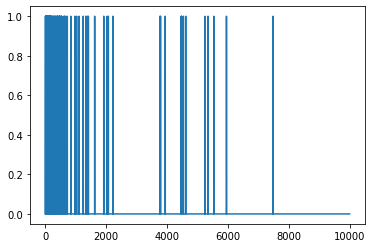

In [7]:
plt.plot(train_data[0])

In [8]:
baseline_model = keras.Sequential([
    # `.summary` を見るために`input_shape`が必要 
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
20/20 - 4s - loss: 0.6167 - accuracy: 0.7274 - binary_crossentropy: 0.6167 - val_loss: 0.5085 - val_accuracy: 0.8351 - val_binary_crossentropy: 0.5085
Epoch 2/20
20/20 - 1s - loss: 0.3946 - accuracy: 0.8854 - binary_crossentropy: 0.3946 - val_loss: 0.3755 - val_accuracy: 0.8661 - val_binary_crossentropy: 0.3755
Epoch 3/20
20/20 - 1s - loss: 0.2640 - accuracy: 0.9209 - binary_crossentropy: 0.2640 - val_loss: 0.3200 - val_accuracy: 0.8768 - val_binary_crossentropy: 0.3200
Epoch 4/20
20/20 - 1s - loss: 0.1907 - accuracy: 0.9465 - binary_crossentropy: 0.1907 - val_loss: 0.3043 - val_accuracy: 0.8753 - val_binary_crossentropy: 0.3043
Epoch 5/20
20/20 - 1s - loss: 0.1423 - accuracy: 0.9635 - binary_crossentropy: 0.1423 - val_loss: 0.3075 - val_accuracy: 0.8741 - val_binary_crossentropy: 0.3075
Epoch 6/20
20/20 - 1s - loss: 0.1079 - accuracy: 0.9747 - binary_crossentropy: 0.1079 - val_loss: 0.3203 - val_accuracy: 0.8712 - val_binary_crossentropy: 0.3203
Epoch 7/20
20/20 - 1s - loss

In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
20/20 - 2s - loss: 0.6790 - accuracy: 0.6818 - binary_crossentropy: 0.6790 - val_loss: 0.6570 - val_accuracy: 0.7910 - val_binary_crossentropy: 0.6570
Epoch 2/20
20/20 - 1s - loss: 0.6289 - accuracy: 0.8327 - binary_crossentropy: 0.6289 - val_loss: 0.6114 - val_accuracy: 0.8215 - val_binary_crossentropy: 0.6114
Epoch 3/20
20/20 - 1s - loss: 0.5722 - accuracy: 0.8561 - binary_crossentropy: 0.5722 - val_loss: 0.5613 - val_accuracy: 0.8420 - val_binary_crossentropy: 0.5613
Epoch 4/20
20/20 - 1s - loss: 0.5110 - accuracy: 0.8821 - binary_crossentropy: 0.5110 - val_loss: 0.5103 - val_accuracy: 0.8464 - val_binary_crossentropy: 0.5103
Epoch 5/20
20/20 - 1s - loss: 0.4494 - accuracy: 0.8923 - binary_crossentropy: 0.4494 - val_loss: 0.4619 - val_accuracy: 0.8565 - val_binary_crossentropy: 0.4619
Epoch 6/20
20/20 - 1s - loss: 0.3924 - accuracy: 0.9021 - binary_crossentropy: 0.3924 - val_loss: 0.4207 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.4207
Epoch 7/20
20/20 - 1s - loss

In [12]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [13]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20


In [ ]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

Error: Session cannot generate requests

In [ ]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Error: Session cannot generate requests

In [ ]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

Error: Session cannot generate requests

In [ ]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Error: Session cannot generate requests

In [ ]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

Error: Session cannot generate requests